In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# Reading the data
#Importing the data from the csv file
data = pd.read_csv(r"C:\Users\ADORABELLA\Documents\GODWIN\CAREER\DATA ANALYST\PORTFOLIO\Rune Tutorials\Financial Analysis\AAPL.csv", index_col=0, parse_dates=True)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-03,135.759995,135.770004,133.610001,133.940002,133.119339,89880900
2021-02-04,136.300003,137.399994,134.589996,137.389999,136.548218,84183100
2021-02-05,137.350006,137.419998,135.860001,136.759995,136.125168,75693800
2021-02-08,136.029999,136.960007,134.919998,136.910004,136.274490,71297200
2021-02-09,136.619995,137.880005,135.850006,136.009995,135.378647,76774200


In [6]:
#Calculating the exponential moving average for a period of 12 and 26 days respectively
#MACD
#MACD is a lagging indicator when trading on the crossovers
#https://www.investopedia.com/terms/m/macd.asp
#Calculation (12-26-9 MACD (default))

#MACD=12-Period EMA − 26-Period EMA
#Singal line 9-Perioed EMA of MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
Date,,,,,,,,
2022-01-27,162.449997,163.839996,158.279999,159.220001,159.220001,121954600,-3.057536,-1.137594
2022-01-28,165.710007,170.350006,162.800003,170.330002,170.330002,179935700,-2.412174,-1.392510
2022-01-31,170.160004,175.000000,169.509995,174.779999,174.779999,115541600,-1.524073,-1.418823
2022-02-01,174.009995,174.839996,172.309998,174.610001,174.610001,86213900,-0.824460,-1.299950
2022-02-02,174.750000,175.880005,173.330002,175.839996,175.839996,79172100,-0.168816,-1.073723


<IPython.core.display.Javascript object>


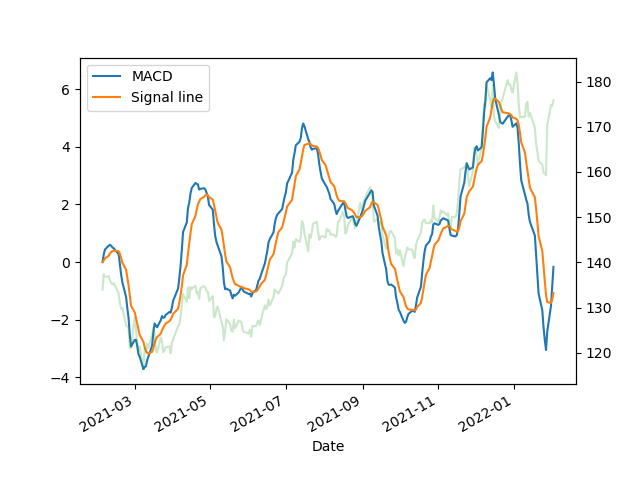

<AxesSubplot:>

In [8]:
# Visualizing the data
fig, ax = plt.subplots()
data[['MACD', 'Signal line']].plot(ax=ax)
data['Close'].plot(ax=ax, alpha=0.25, secondary_y=True)

In [9]:
#Stochastic oscillator
#Lagging indicator
#https://www.investopedia.com/terms/s/stochasticoscillator.asp
#Calculations

#14-high: Maximum of last 14 trading days
#14-low: Minimum of last 14 trading days
#%K: (Last close - 14-low)*100 / (14-high - 14-low)
#%D: Simple Moving Average of %K

high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14)*100/(high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [10]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
2022-01-27,162.449997,163.839996,158.279999,159.220001,159.220001,121954600,-3.057536,-1.137594,20.106783,20.749786
2022-01-28,165.710007,170.350006,162.800003,170.330002,170.330002,179935700,-2.412174,-1.392510,69.528504,37.277607
2022-01-31,170.160004,175.000000,169.509995,174.779999,174.779999,115541600,-1.524073,-1.418823,89.323868,59.653052
2022-02-01,174.009995,174.839996,172.309998,174.610001,174.610001,86213900,-0.824460,-1.299950,88.567649,82.473341
2022-02-02,174.750000,175.880005,173.330002,175.839996,175.839996,79172100,-0.168816,-1.073723,96.441610,91.444376


<IPython.core.display.Javascript object>


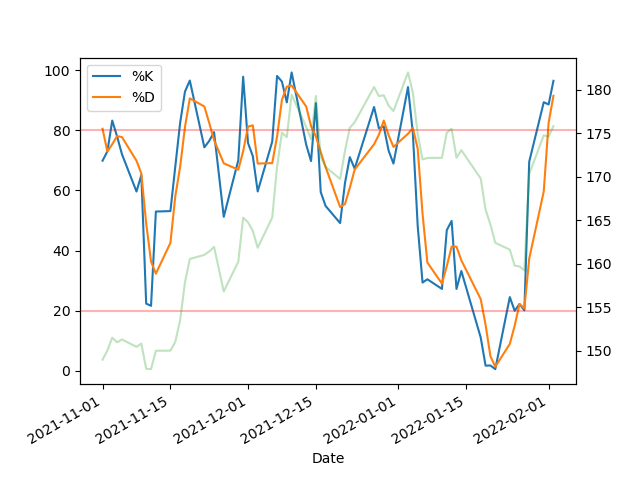

<AxesSubplot:>

In [11]:
# To visualize the data
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-11-01':].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)
data['Close'].loc['2021-11-01':].plot(ax=ax, alpha=0.3, secondary_y=True)